In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('data.csv')

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1790,2022-10-04,1323.278320,1364.970947,1320.076660,1362.126587,1362.126587,10139774963
1791,2022-10-05,1361.972900,1362.451782,1320.855103,1352.837158,1352.837158,9774451820
1792,2022-10-06,1352.806641,1380.404907,1349.449951,1351.709473,1351.709473,12033514861
1793,2022-10-07,1351.836426,1359.328125,1321.746094,1332.516968,1332.516968,10061619355


In [10]:
df = df[['Date', 'Open']]

In [11]:
open = list(df['Open'])

In [26]:
import random

In [27]:
def Random(n):
    return [random.randrange(n) for x in range(n)]


In [31]:
Random(5)

[3, 3, 1, 3, 1]

In [93]:
import matplotlib.pyplot as plt
import statistics

In [104]:
def montecarlo(data, times = 50, day = 100):
    projects = []
    color = iter(plt.cm.rainbow(np.linspace(0, 1, times)))
    for i in range(times):
       
        rate = [open[x+1]/open[x] for x in range(len(open)-2)]
        rand = Random(len(rate))
        randrate = [rate[x] for x in rand]
        #print(rate)
        project = [data[-1]]
        for x in range(len(rate) - 1):
            project.append(project[x]*randrate[x+1])
        #print(project)
        projects.append(project)
        c = next(color)
        tradingday = range(len(rate))
        plt.plot(tradingday, project, c)
    plt.xlabel('Trading Day')
    plt.ylabel('USD')
    plt.title('Value of Asset')
    plt.show()
    values = [x[day] for x in projects]
    n, bins, patches = plt.hist(values, 20, density=True, facecolor='g', alpha=0.75)
    plt.xlabel("USD")
    plt.ylabel('Probability')
    plt.show()
    
    return values


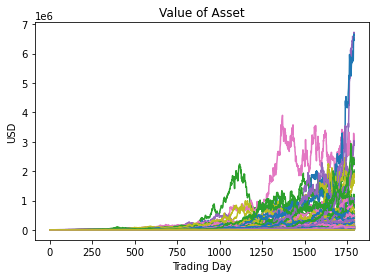

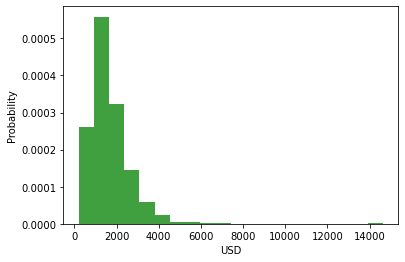

In [105]:
values = montecarlo(open, 1000)

In [103]:
print(statistics.mean(values))
print(statistics.stdev(values))
print(np.quantile(values,[0,0.25,0.5,0.75,1]))


1641.9321564990705
946.2579951627907
[ 230.59107827 1005.41235792 1436.78761929 2033.13768664 7826.47526885]
